In [37]:
import pandas as pd
import numpy as np
import os
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data_df = pd.read_excel('Boston_Housing.xls')
data_df.shape

(506, 14)

In [16]:
data_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [33]:
from sklearn.datasets import load_boston
bos = load_boston()
print(bos.keys())
print(bos.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

### hypothesis & my assumptions

- Crime_rate, NOX, TAX - having high values for this variables will detter people from buying houses in those areas and hence prices will have low in those areas.

- DIS (employment services), PTRATIO (teacher-pupil ratio), RAD (access to highways), RM (more no.of rooms) are positive indicators for buying a house..hence prices will be more with higher values in this variables.

In [34]:
print(" total null cells in dataset :", data_df.isnull().sum().sum())

 total null cells in dataset : 0


In [35]:
data_df.describe(percentiles=[0.5]).transpose()

,count,mean,std,min,50%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.25651,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.00000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,9.69000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.00000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.53800,0.8710
RM,506.0,6.284634,0.702617,3.56100,6.20850,8.7800
AGE,506.0,68.574901,28.148861,2.90000,77.50000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,3.20745,12.1265
RAD,506.0,9.549407,8.707259,1.00000,5.00000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,330.00000,711.0000


#### Observations:

 - The mean and median(50%) of following (CRIM, ZN, AGE, RAD, TAX, B) features is varying by large margin...hence the distrubution of these variables will be skewed and these variable will also have outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000142756B0B00>,
      dtype=object)

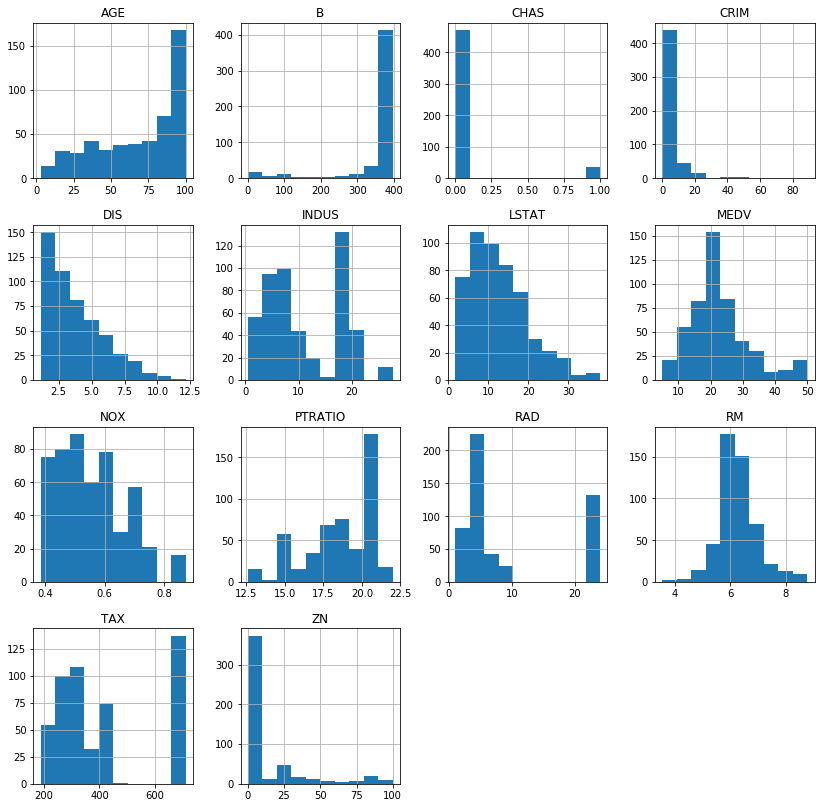

In [84]:
data_df.hist(figsize = (14,14)) 

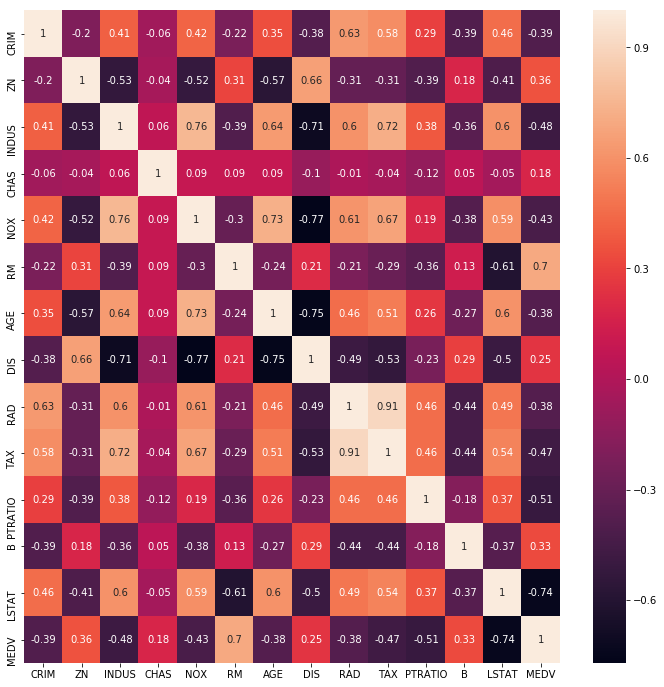

In [41]:
correlation_matrix = data_df.corr().round(2)
plt.figure(figsize = (12,12))
sns.heatmap(data=correlation_matrix, annot=True)

#### Observations:
- target variable `MEDV` has strong correlations with `LSTAT (-0.74)`, `RM (+ 0.7)` , hence will be most important variables for linear models.
- CHAS has least correlation with the target variable, will be the least important variable for linear models.
- `TAX` and `RAD` are highly correlated, one of them can be excluded to avoid the problem of multi-collinearity incase of linear models. `TAX` is preferrable of both beacause it is high correlation with `MEDV` compared to `RAD`

### Analysis with Target Variable

(<matplotlib.axes._subplots.AxesSubplot at 0x142708f62b0>, count    506.000000
 mean      22.532806
 std        9.197104
 min        5.000000
 25%       17.025000
 50%       21.200000
 75%       25.000000
 max       50.000000
 Name: MEDV, dtype: float64)

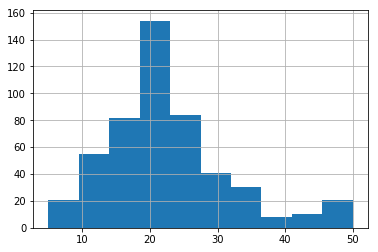

In [19]:
target_var = df['MEDV']
target_var.hist(), target_var.describe()

#### observations:
- the `median_price_value` of most houses is in range (0,36), except for few outliers in range of (40,50).

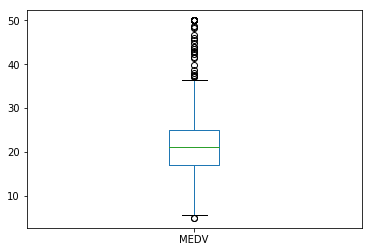

In [12]:
target_var.plot(kind = 'box')

- the above boxplot confirms the above statement regrading outliers

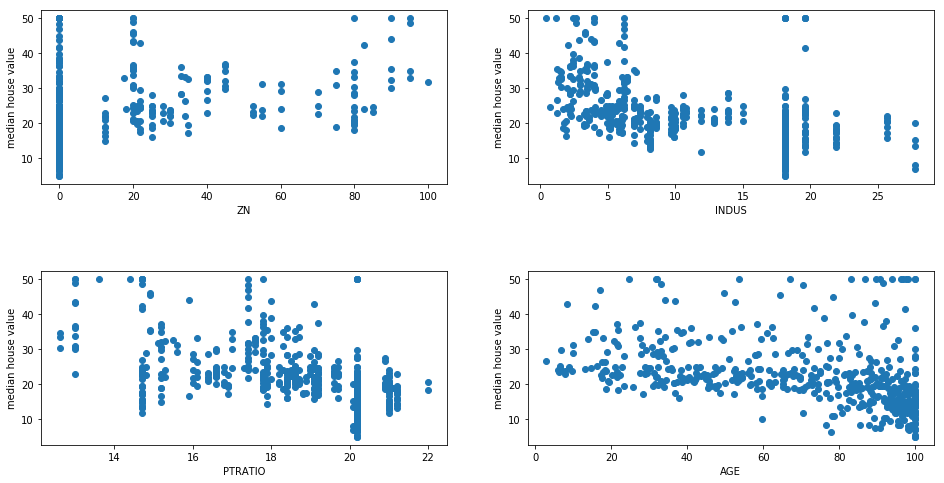

In [72]:
f, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(16,8))
columns = ['ZN', 'INDUS', 'PTRATIO', 'AGE']
row = 0
col = 0
for i, column in enumerate(columns):
    ax[row][col].scatter(data_df[column], data_df['MEDV'])
    ax[row][col].set_xlabel(column)
    ax[row][col].set_ylabel('median house value')
    col += 1
    if col == 2:
        col = 0
        row += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

#### Observations:
- for these above four variables, the house prices are spread very wide with not much patterns.

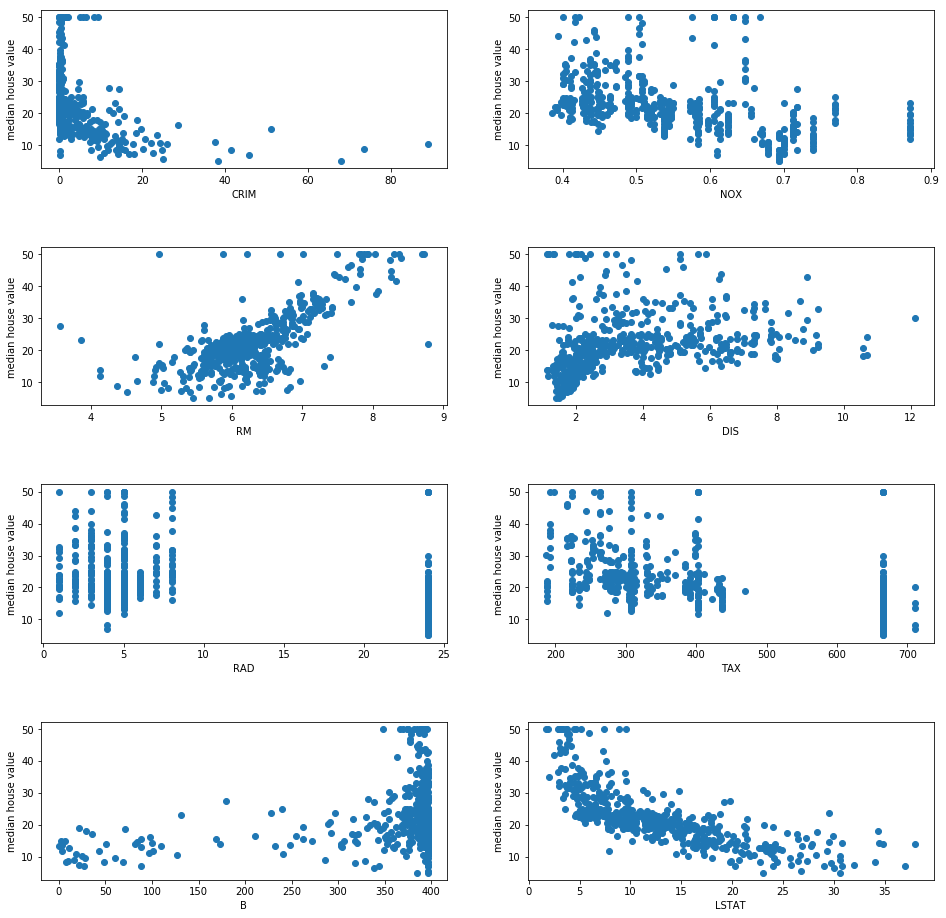

In [83]:
f, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(16,16))
columns = ['CRIM','NOX', 'RM', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']
row = 0
col = 0
for i, column in enumerate(columns):
    ax[row][col].scatter(data_df[column], data_df['MEDV'])
    ax[row][col].set_xlabel(column)
    ax[row][col].set_ylabel('median house value')
    col += 1
    if col == 2:
        col = 0
        row += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

#### Observations:
- with increaing crime rate > 40, there are less houses and median prices of those are also low
- For areas with NOX values > 0.7, the median house prices reduced
- As no.of rooms increases, prices are also increasing. reaching max values for rooms > 7.
- As Distance (DIS) to employment servives is low i.e < 4, the houses are getting pricer.
- Houses are compartively cheap for higher values of Radiation and Taxes.
- House prices are low, where the proportion of blacks (B) < 350.
- As % lower status of population (LSTAT) increases, the prices of houses are coming down.(almost linear relationship)

In [20]:
feature_vars = data_df.drop('MEDV', axis = 1)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_vars,target_var,test_size=0.30,random_state=0)

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs = -1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(X_test, y_test))

MAE 3.6099040603818233
MSE 27.19596576688338
RMSE 5.21497514537542
Score: 0.6733825506400175


In [88]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train , y_train)
y_pred = rf.predict(X_test)
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(X_test, y_test)) 

MAE 2.4386276315789464
MSE 14.649288434473682
RMSE 3.827438887098484
Score: 0.6733825506400175
